<h1>Dubai Houses Renting Prediction</h1>


In [85]:
from pandas import *
from matplotlib.pyplot import *
import seaborn as sns
from numpy import *

In [86]:
data = read_csv("dubai_properties.csv")
data.sample(5)

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
70521,"East Village, Aljada, Sharjah",42000,1,2,Apartment,850,49.411765,Low,Yearly,Unfurnished,For Rent,2024-02-13,68,Aljada,Sharjah,25.318168,55.475434
68707,"Al Mamzar Towers, Al Mamzar, Sharjah",75000,3,4,Apartment,2210,33.936652,Medium,Yearly,Unfurnished,For Rent,2024-03-28,24,Al Mamzar,Sharjah,25.308453,55.367138
50031,"Address Harbour Point, Dubai Creek Harbour, Dubai",149999,1,2,Apartment,729,205.759945,High,Yearly,Furnished,For Rent,2024-02-26,55,Dubai Creek Harbour,Dubai,25.197978,55.360380
27463,"Ajman Industrial 1, Ajman Industrial, Ajman",18000,1,2,Apartment,800,22.500000,Low,Yearly,Unfurnished,For Rent,2023-12-06,137,Ajman Industrial,Ajman,25.371966,55.465856
58812,"Sydney Tower, JVC District 18, Jumeirah Villag...",50000,0,2,Apartment,400,125.000000,Low,Yearly,Furnished,For Rent,2024-02-21,60,Jumeirah Village Circle (JVC),Dubai,25.055945,55.207465


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

In [88]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Rent,73742.0,147925.001668,306965.830103,0.000000,54999.000000,98000.000000,170000.000000,5.500000e+07
Beds,73742.0,2.162811,1.578155,0.000000,1.000000,2.000000,3.000000,1.200000e+01
Baths,73742.0,2.650213,1.632997,1.000000,2.000000,2.000000,3.000000,1.100000e+01
Area_in_sqft,73742.0,2054.053552,3003.919252,74.000000,850.000000,1334.000000,2130.000000,2.102540e+05
Rent_per_sqft,73742.0,88.057754,66.534400,0.000000,39.977778,71.428571,118.483412,2.182045e+03
Age_of_listing_in_days,73742.0,74.261547,72.346767,11.000000,30.000000,52.000000,95.000000,2.276000e+03
Latitude,73023.0,24.918929,0.569356,15.175847,24.493598,25.078641,25.197978,2.592031e+01
Longitude,73023.0,55.053133,0.653722,43.351928,54.607372,55.238209,55.367138,5.636129e+01


<h2> Data Cleaning </h2>

In [89]:
data.duplicated().sum()

0

<h3>Dealing With Missing Data</h3>

In [90]:
def nullvalues(data):
    return DataFrame({col: data[col].isnull().sum() for col in data.columns}, index=["null values"]).T
print(data.shape)
nullvalues(data)

(73742, 17)


,null values
Address,0
Rent,0
Beds,0
Baths,0
Type,0
Area_in_sqft,0
Rent_per_sqft,0
Rent_category,0
Frequency,0
Furnishing,0


In [91]:
print(data["Longitude"].mean())
print(data["Longitude"].median())
print(data["Longitude"].std())
print(data["Latitude"].mean())
print(data["Latitude"].median())
print(data["Latitude"].std())

55.0531333689866
55.23820948643042
0.6537222779838704
24.91892948234255
25.0786415
0.5693556084929702


In [92]:
data["Longitude"].fillna(data["Longitude"].mean(),inplace=True)
data["Latitude"].fillna(data["Latitude"].mean(),inplace= True)

C:\Users\W.I\AppData\Local\Temp\ipykernel_9192\1157167093.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Longitude"].fillna(data["Longitude"].mean(),inplace=True)
C:\Users\W.I\AppData\Local\Temp\ipykernel_9192\1157167093.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

<h3>Data Visualization</h3>

In [93]:
print(data["Beds"].nunique())
print(data["Baths"].nunique())
print(data["Type"].nunique())
print(data["Rent_category"].nunique())
print(data["Furnishing"].nunique())
print(data["Location"].nunique())
print(data["City"].nunique())

13
11
9
3
2
441
8


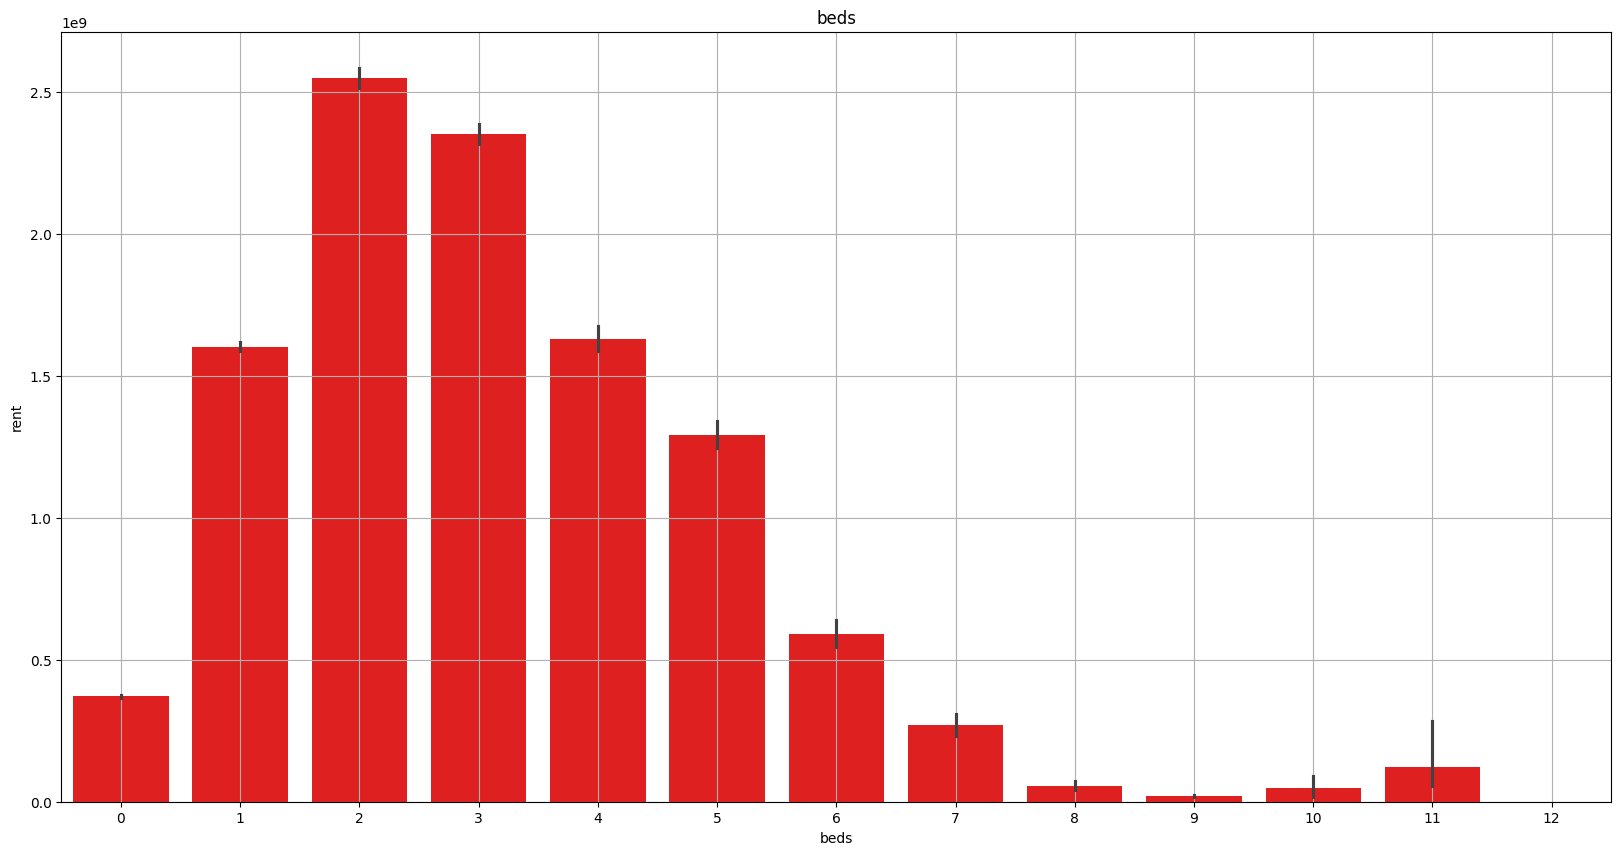

In [94]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["Beds"],y=data["Rent"],color="red",estimator=sum)
title("beds")
xlabel("beds")
ylabel("rent")
grid(True)
show()

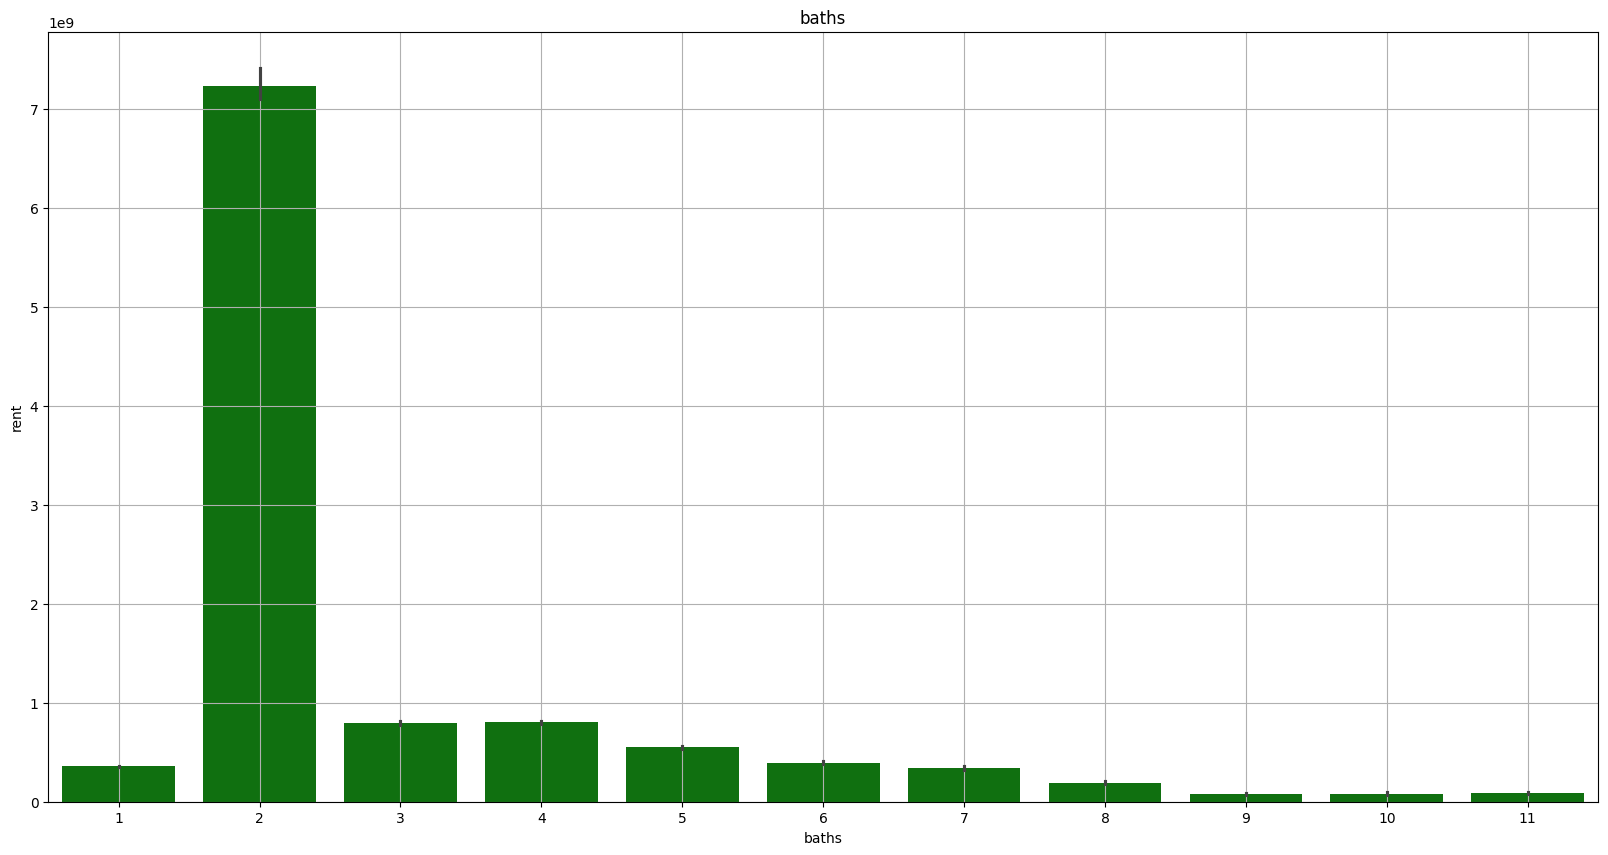

In [95]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["Baths"],y=data["Rent"],color="green",estimator=sum)
title("baths")
xlabel("baths")
ylabel("rent")
grid(True)
show()

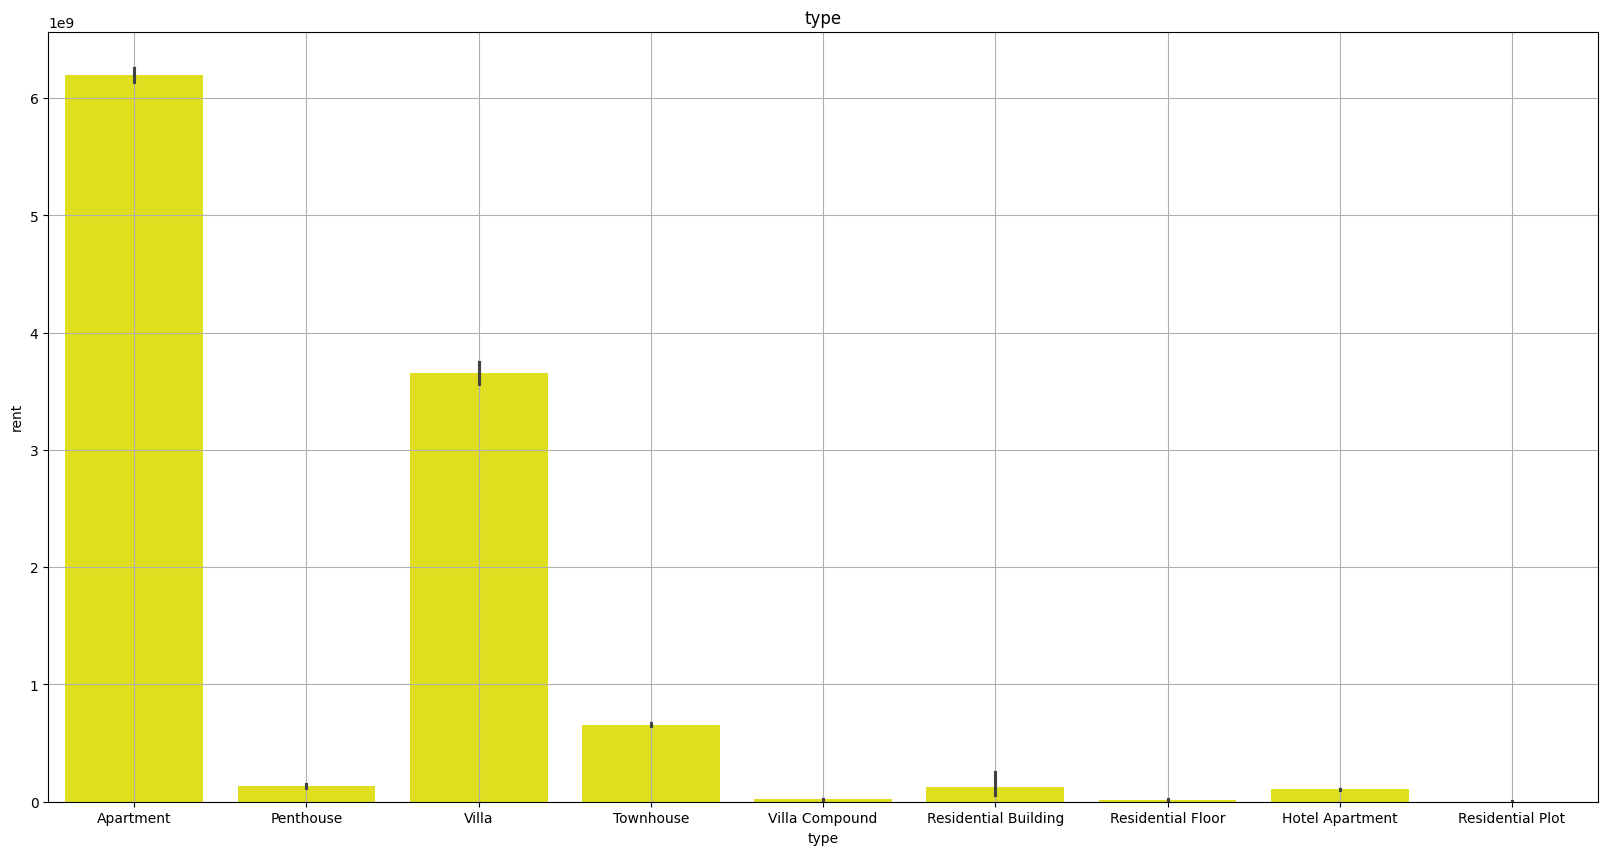

In [96]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["Type"],y=data["Rent"],color="yellow",estimator=sum)
title("type")
xlabel("type")
ylabel("rent")
grid(True)
show()

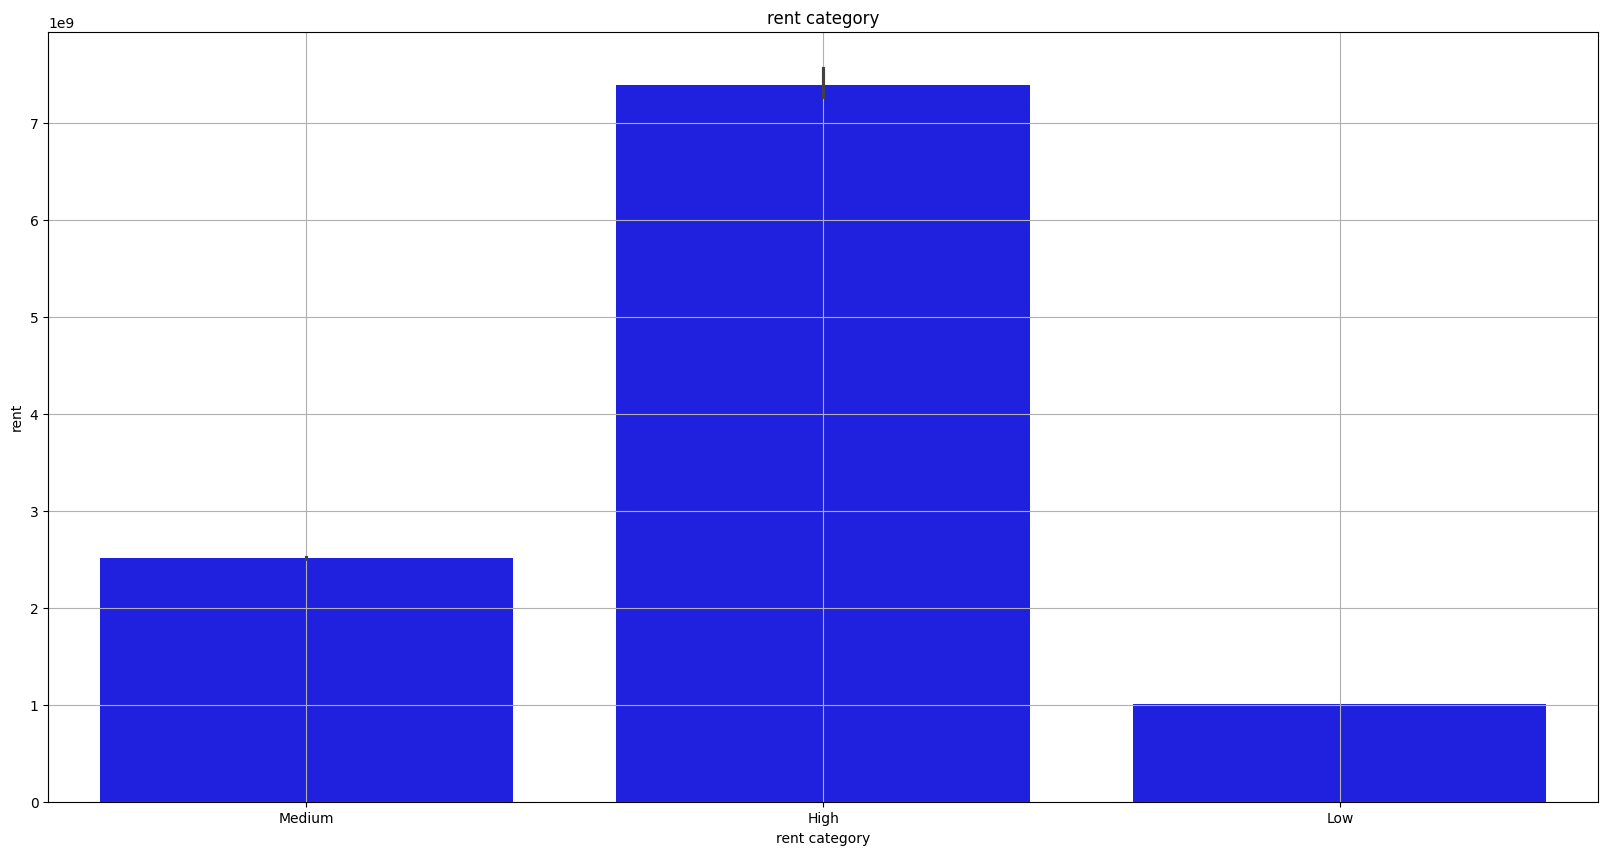

In [97]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["Rent_category"],y=data["Rent"],color="blue",estimator=sum)
title("rent category")
xlabel("rent category")
ylabel("rent")
grid(True)
show()

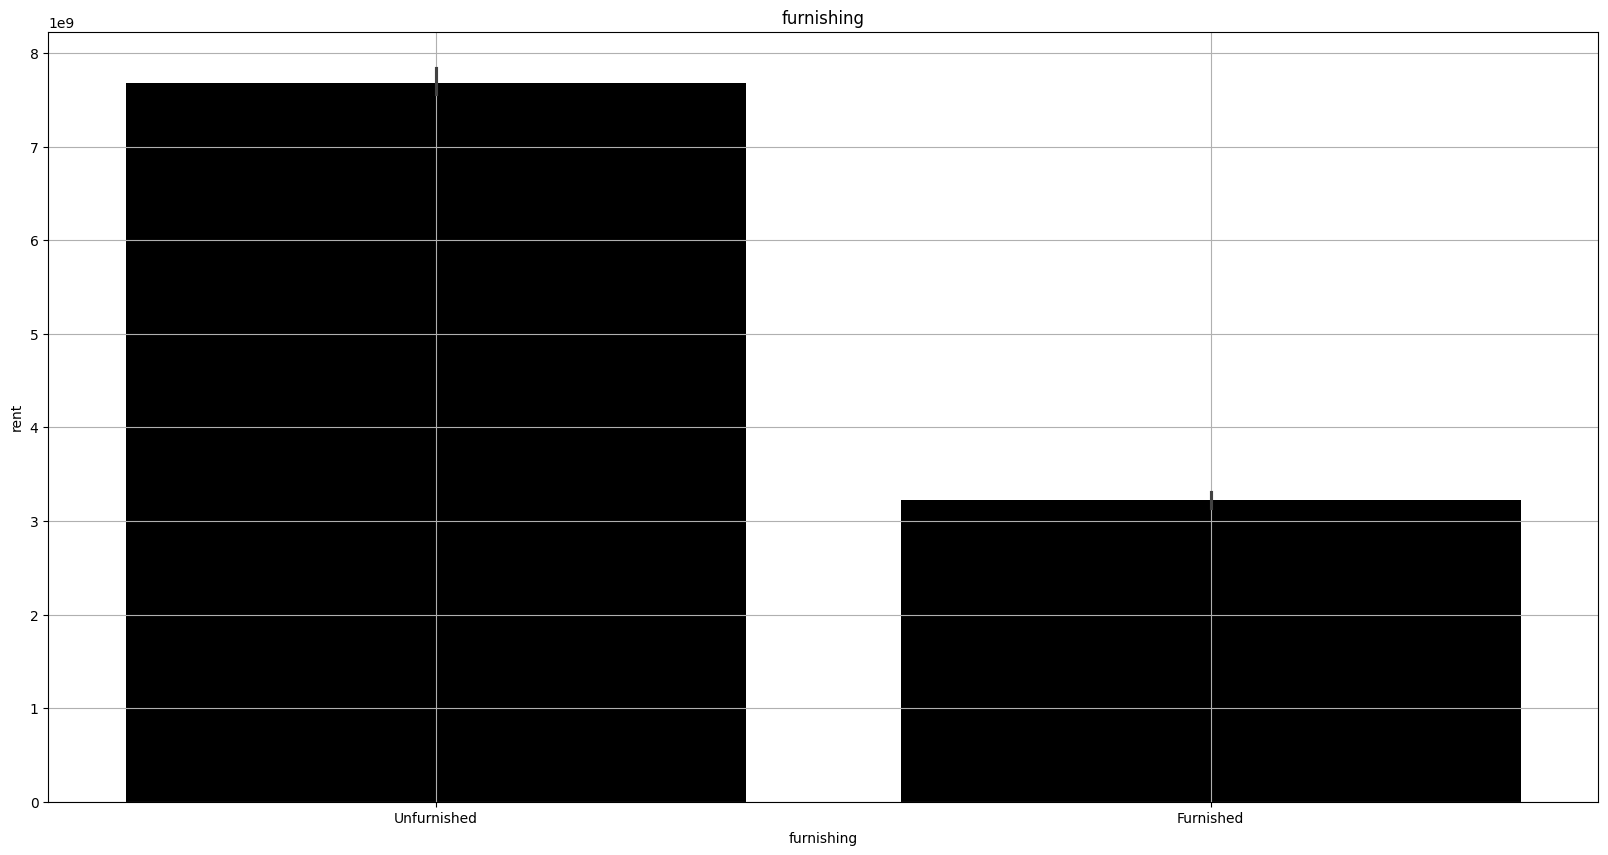

In [98]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["Furnishing"],y=data["Rent"],color="black",estimator=sum)
title("furnishing")
xlabel("furnishing")
ylabel("rent")
grid(True)
show()

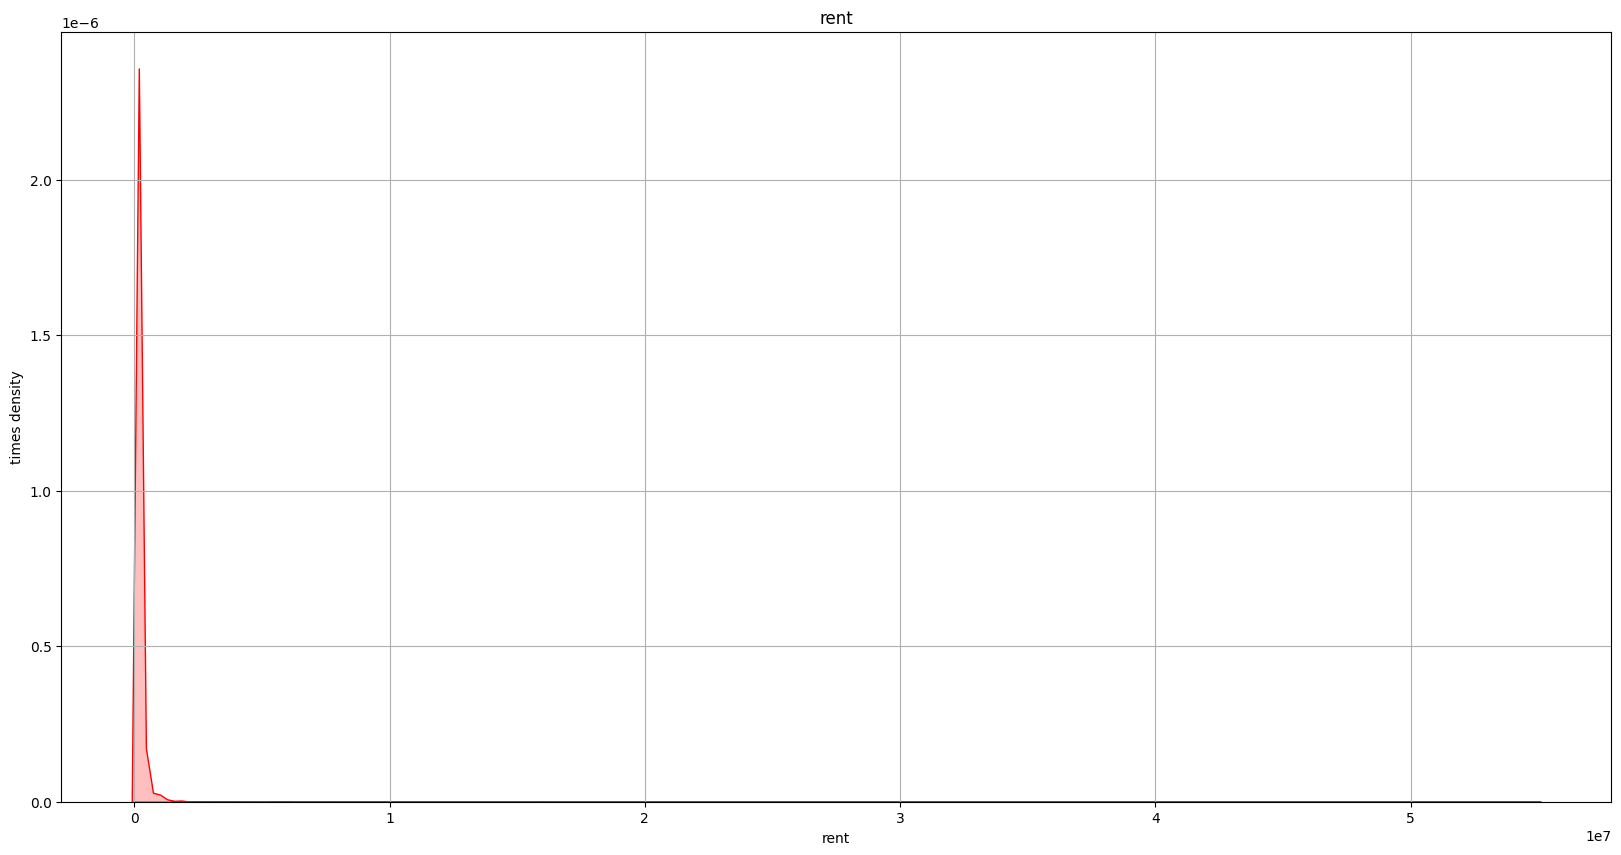

In [99]:
figure(figsize=(20,10))
sns.kdeplot(data= data ,x=data["Rent"],color="red",fill=True)
title("rent")
xlabel("rent")
ylabel("times density")
grid(True)
show()

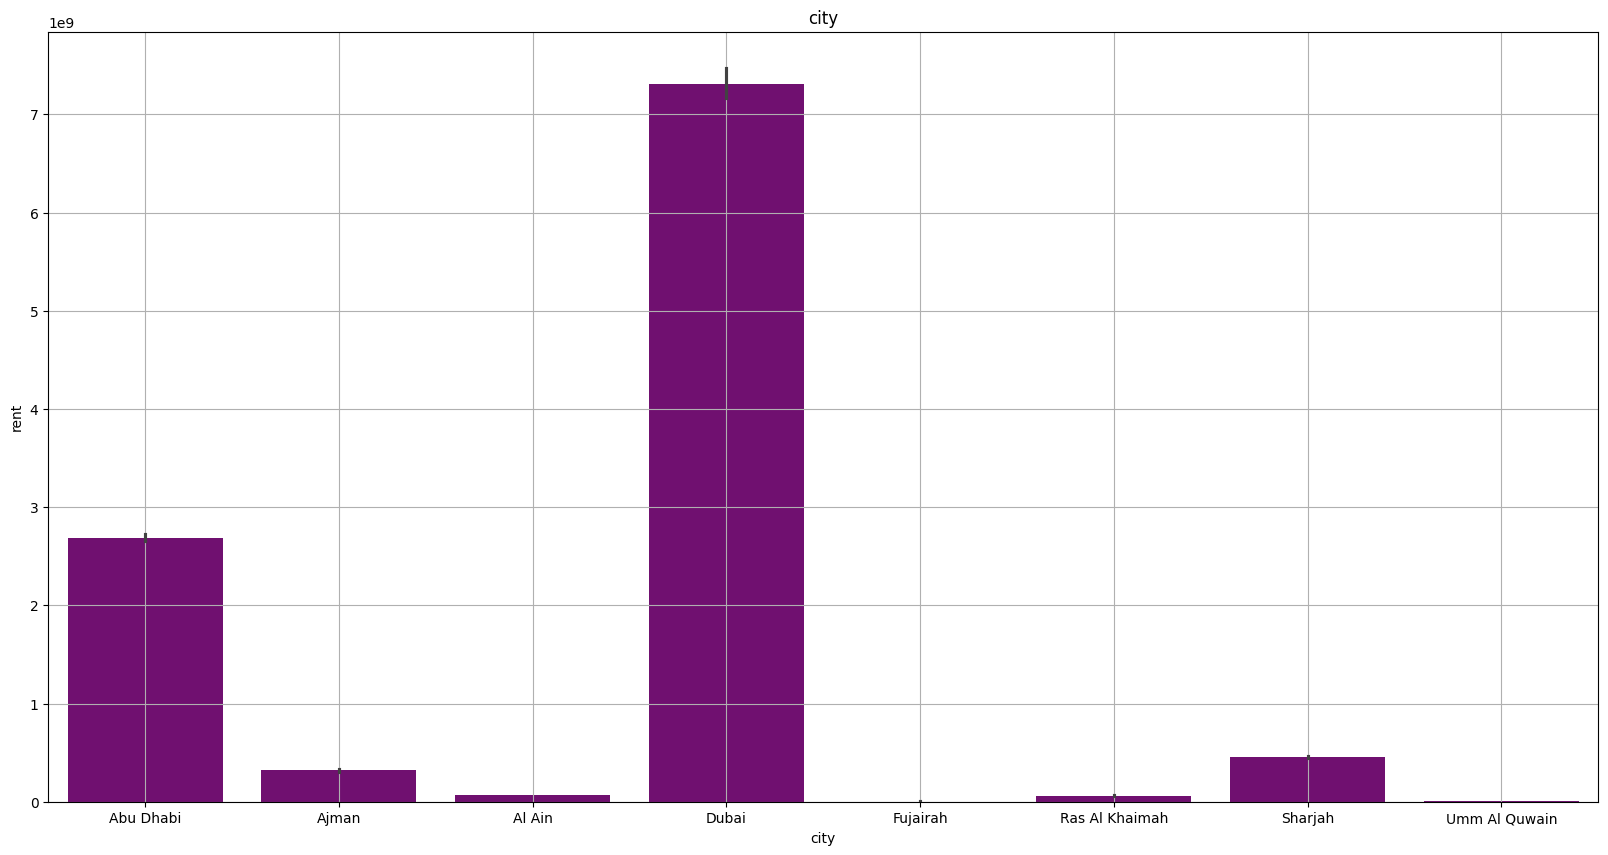

In [100]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["City"],y=data["Rent"],color="purple",estimator=sum)
title("city")
xlabel("city")
ylabel("rent")
grid(True)
show()

<h3> Dealing With Outliers </h3>

In [101]:
mean_ = data["Rent"].mean()
median_ = data["Rent"].median()
std_ = data["Rent"].std()

print(f"the mean of rent value {mean_} \n and median {median_}\n and standard deviation {std_} ")

the mean of rent value 147925.00166797754 
 and median 98000.0
 and standard deviation 306965.8301029959 


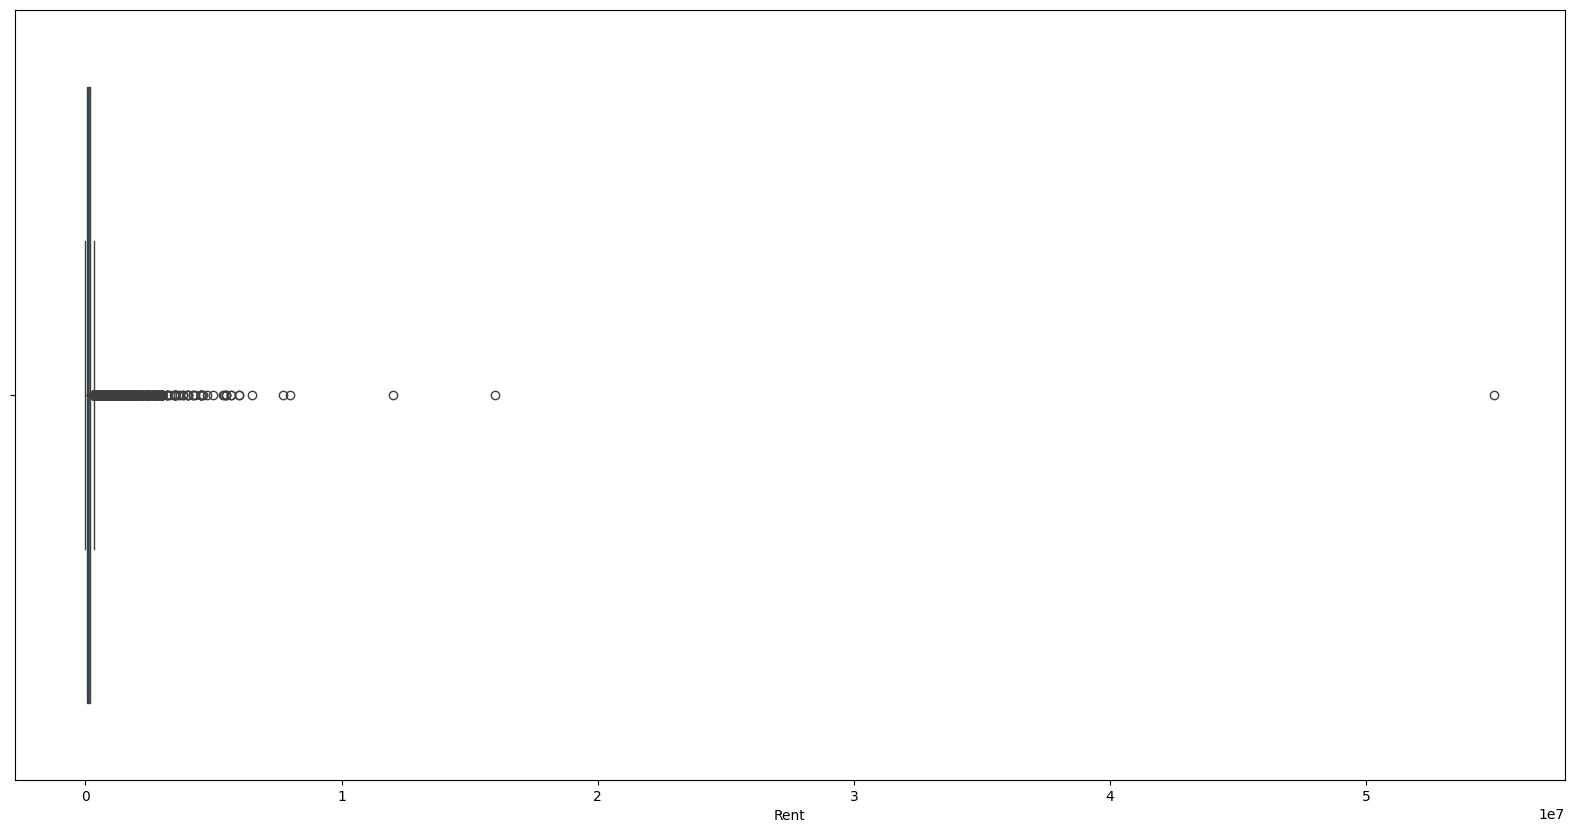

In [102]:
figure(figsize=(20,10))
sns.boxplot(data= data ,x=data["Rent"])
show()

In [103]:
q1 = percentile(data["Rent"], 25)
q3 = percentile(data["Rent"], 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)



In [104]:
data = data[(data["Rent"] >= lower_bound) & (data["Rent"] <= upper_bound)]
data.shape

(68870, 17)

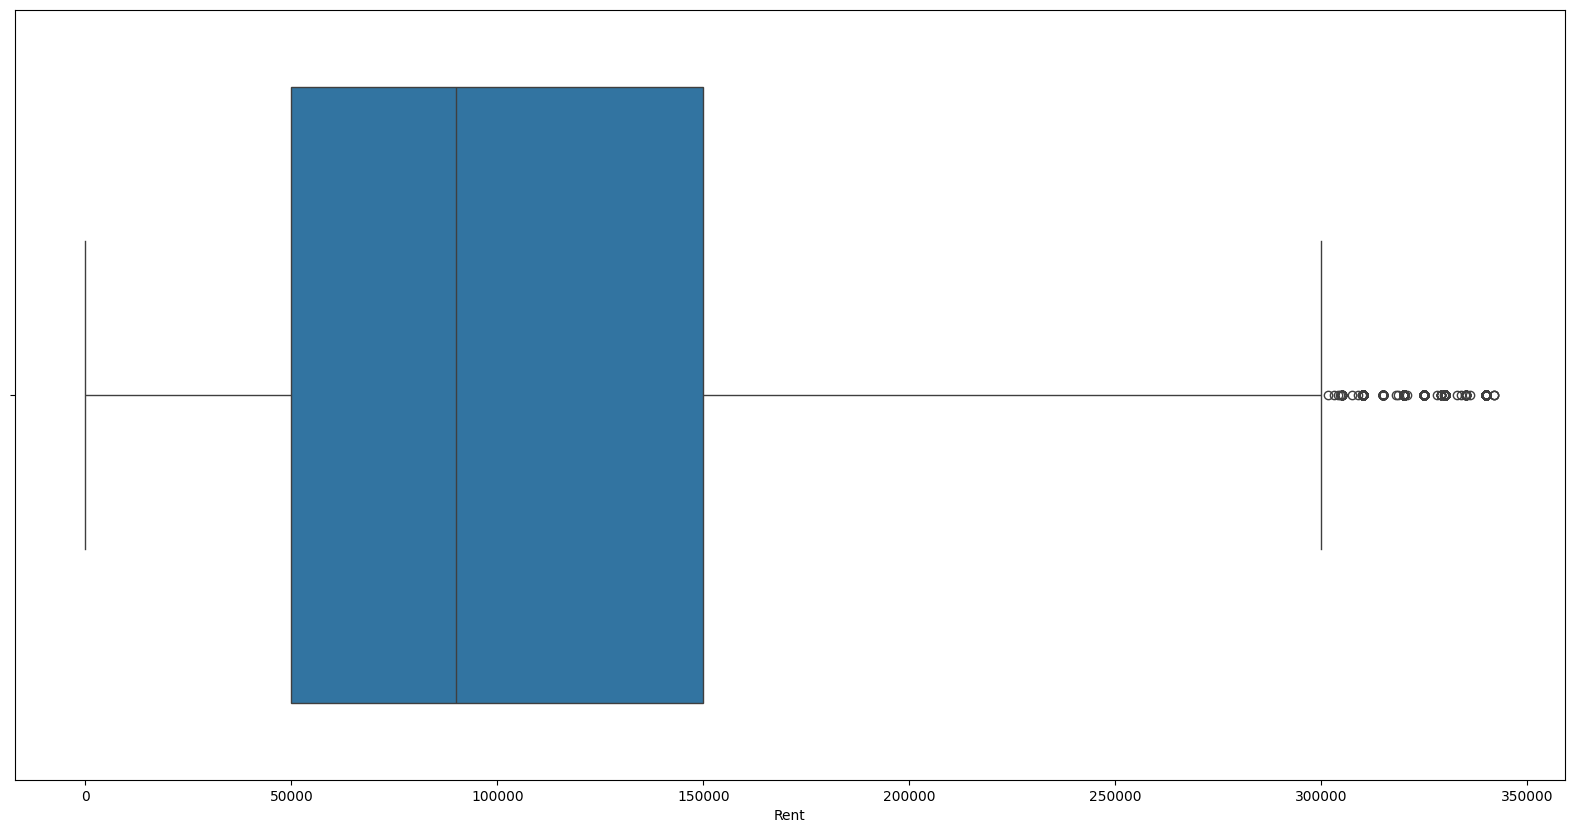

In [105]:
figure(figsize=(20,10))
sns.boxplot(data= data ,x=data["Rent"])
show()

<h3> Data Visual. After Outliers Removal</h3> 

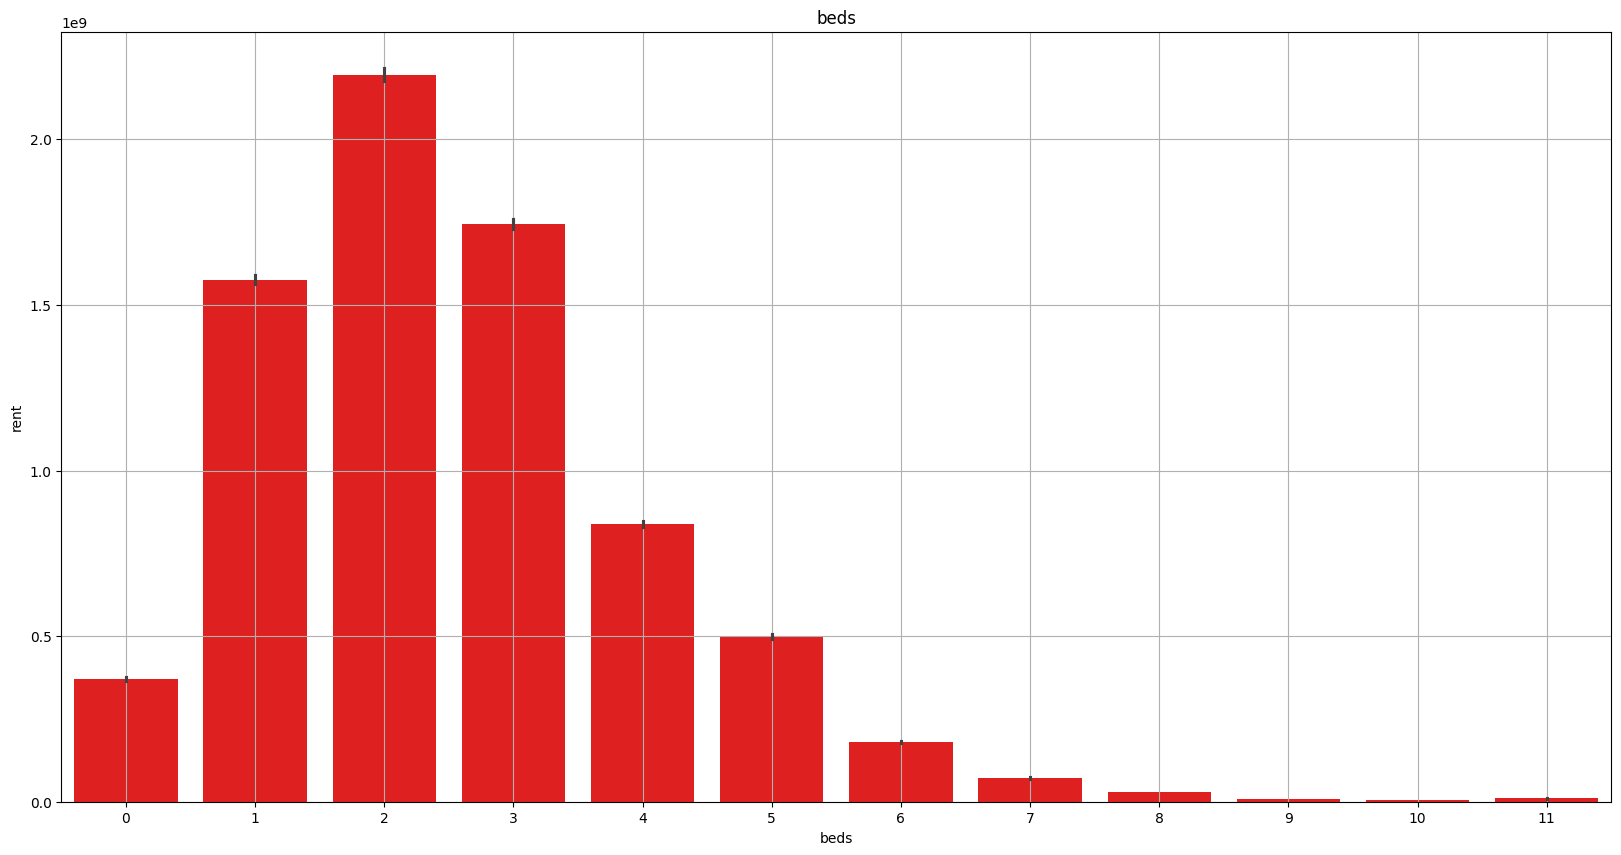

In [106]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["Beds"],y=data["Rent"],color="red",estimator=sum)
title("beds")
xlabel("beds")
ylabel("rent")
grid(True)
show()

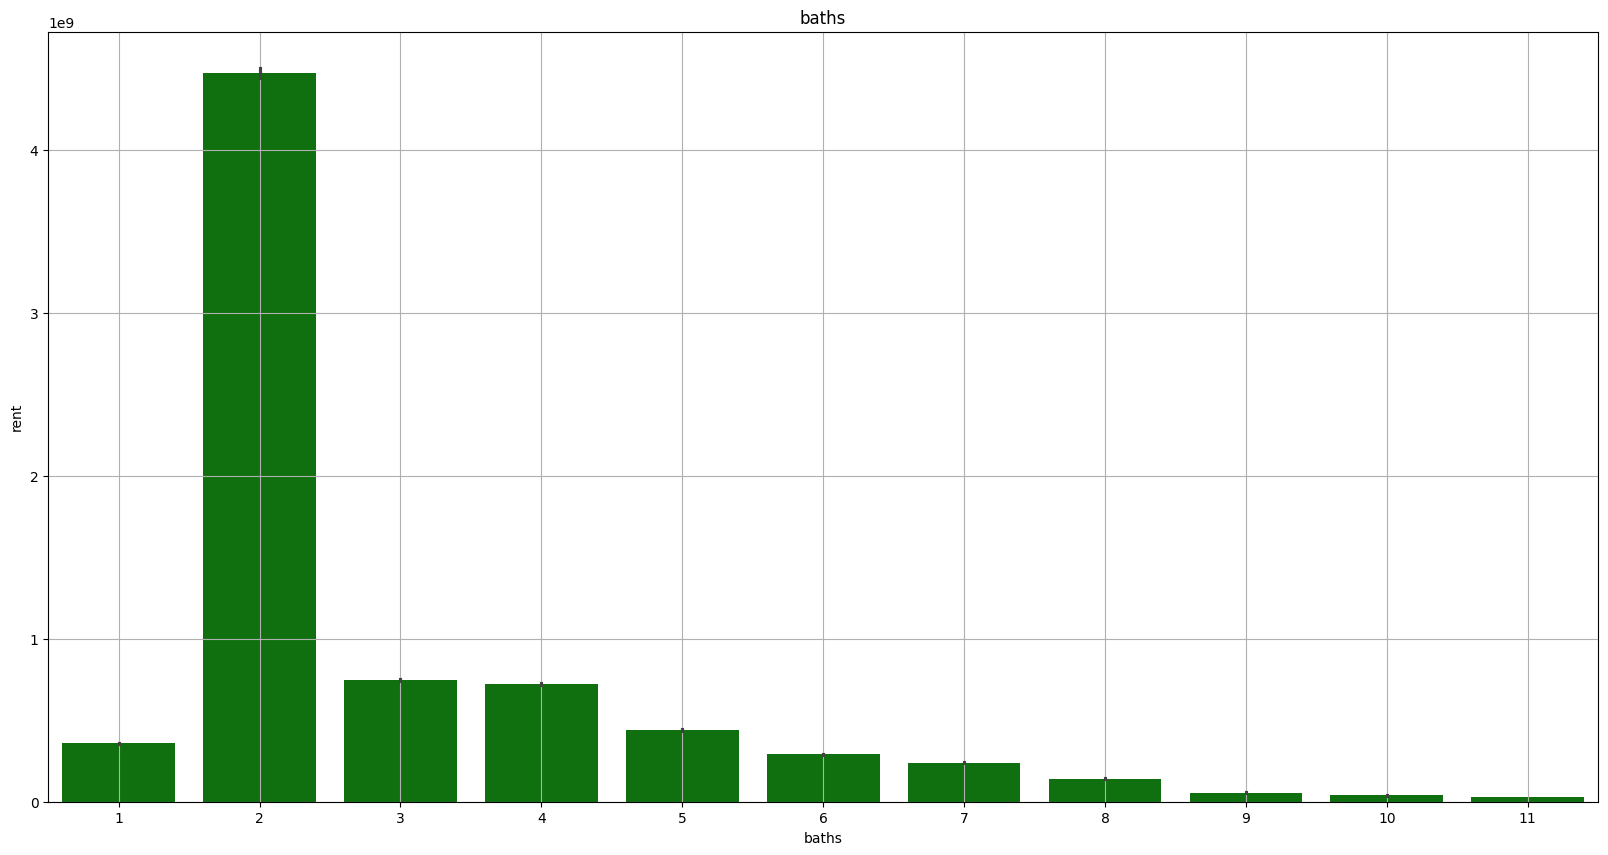

In [107]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["Baths"],y=data["Rent"],color="green",estimator=sum)
title("baths")
xlabel("baths")
ylabel("rent")
grid(True)
show()

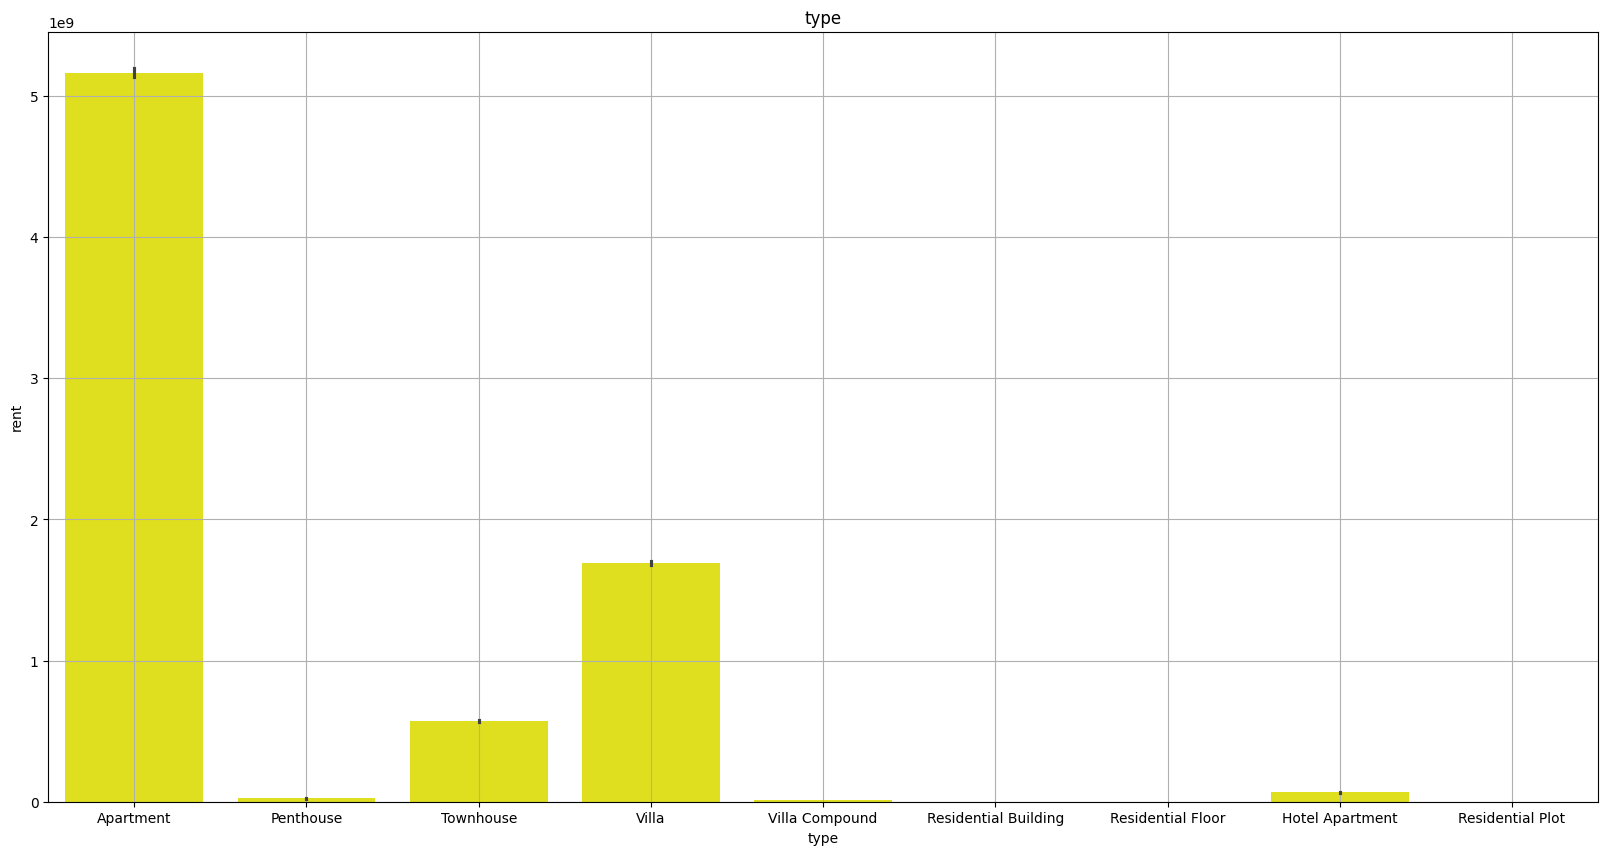

In [108]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["Type"],y=data["Rent"],color="yellow",estimator=sum)
title("type")
xlabel("type")
ylabel("rent")
grid(True)
show()

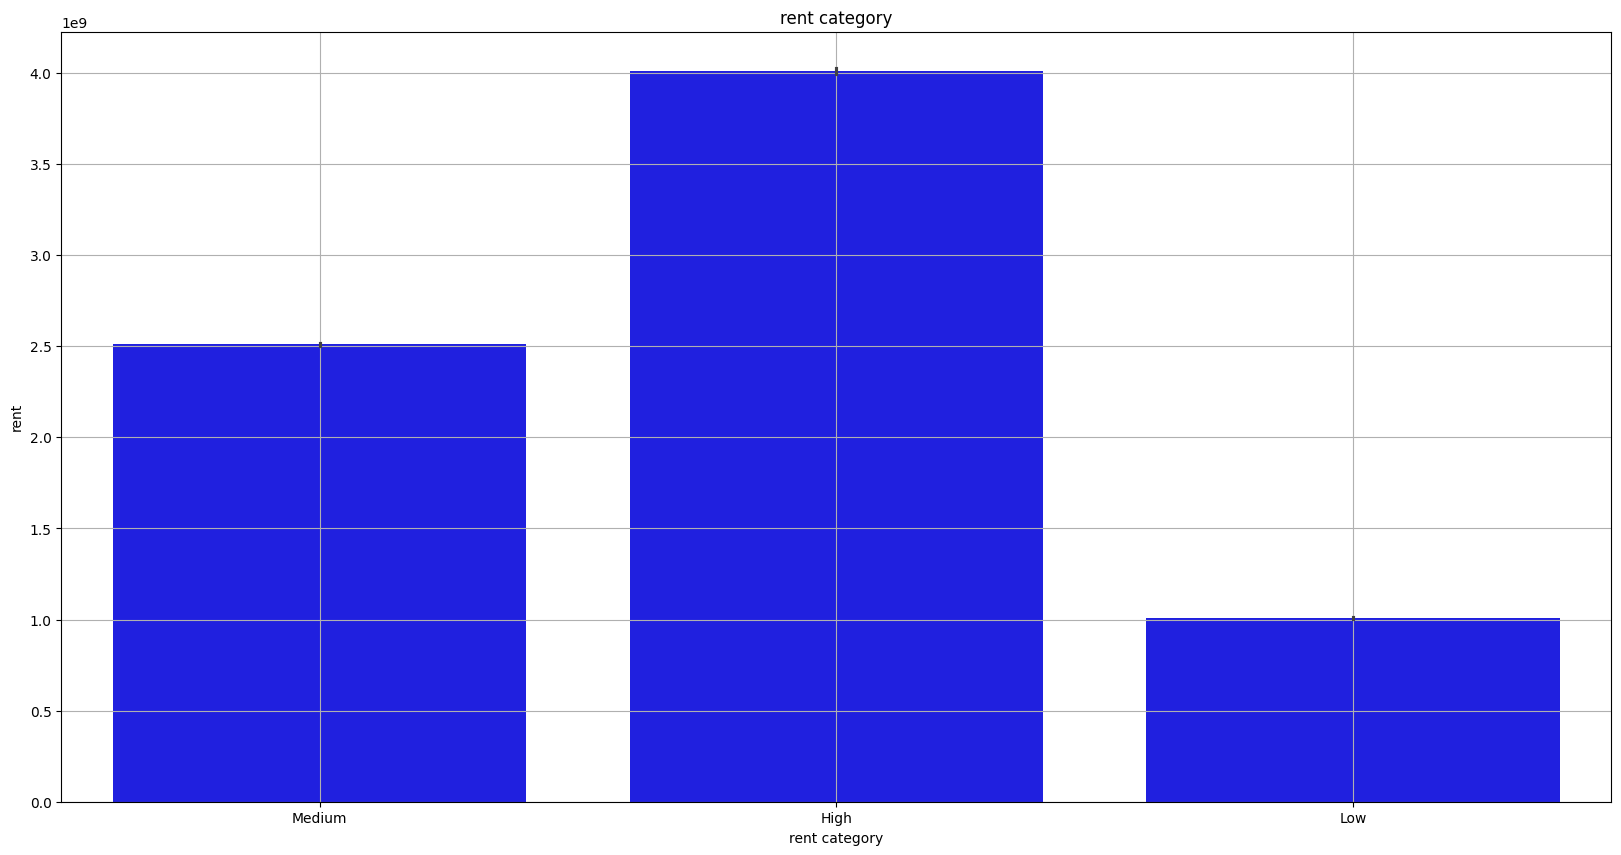

In [109]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["Rent_category"],y=data["Rent"],color="blue",estimator=sum)
title("rent category")
xlabel("rent category")
ylabel("rent")
grid(True)
show()

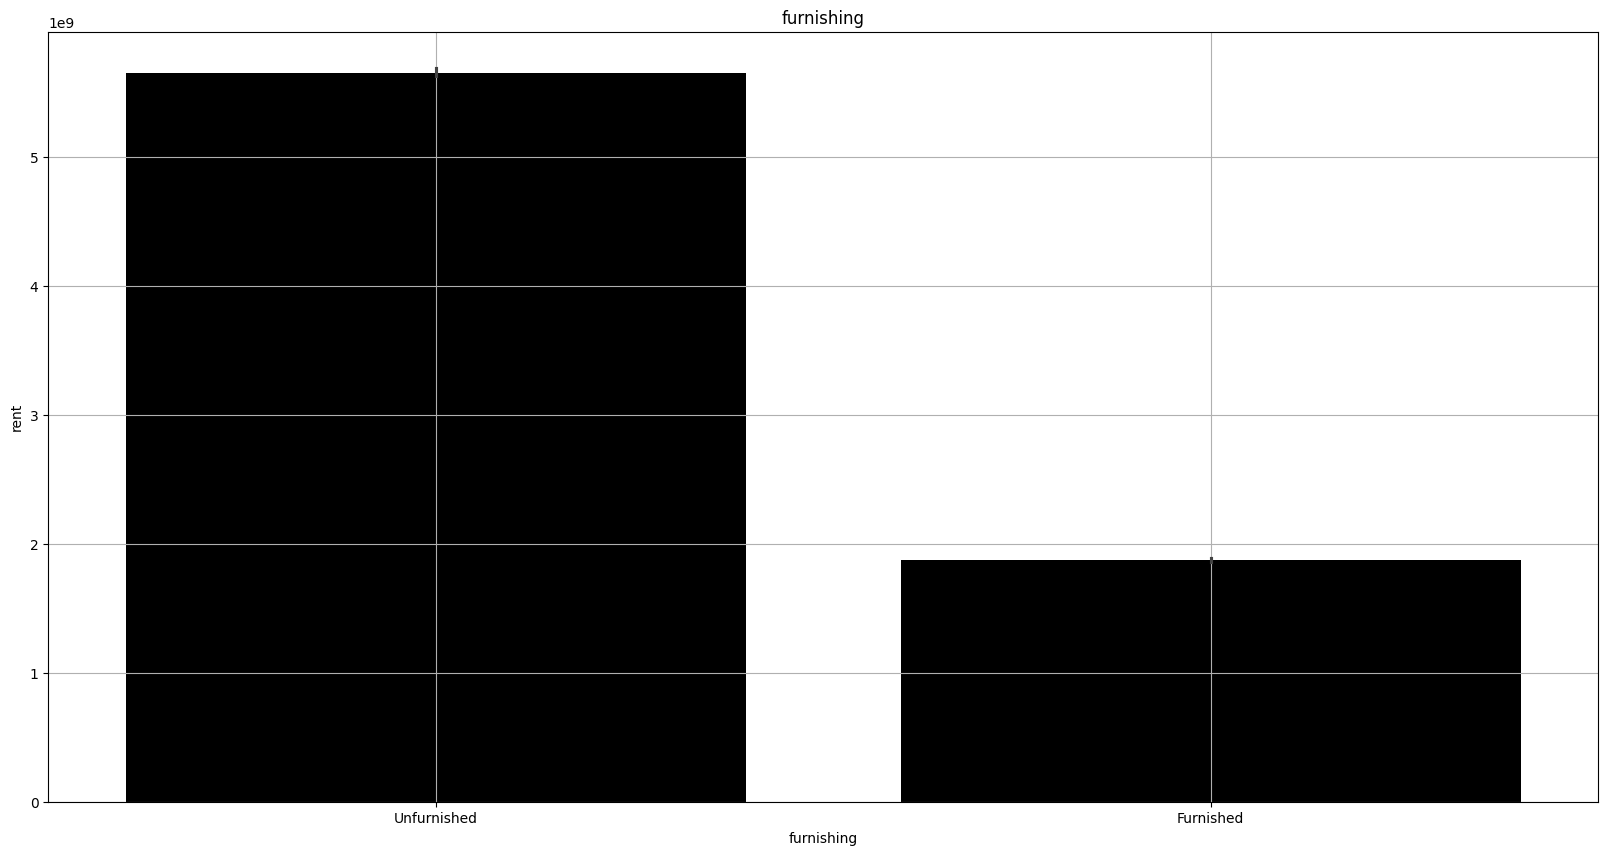

In [110]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["Furnishing"],y=data["Rent"],color="black",estimator=sum)
title("furnishing")
xlabel("furnishing")
ylabel("rent")
grid(True)
show()

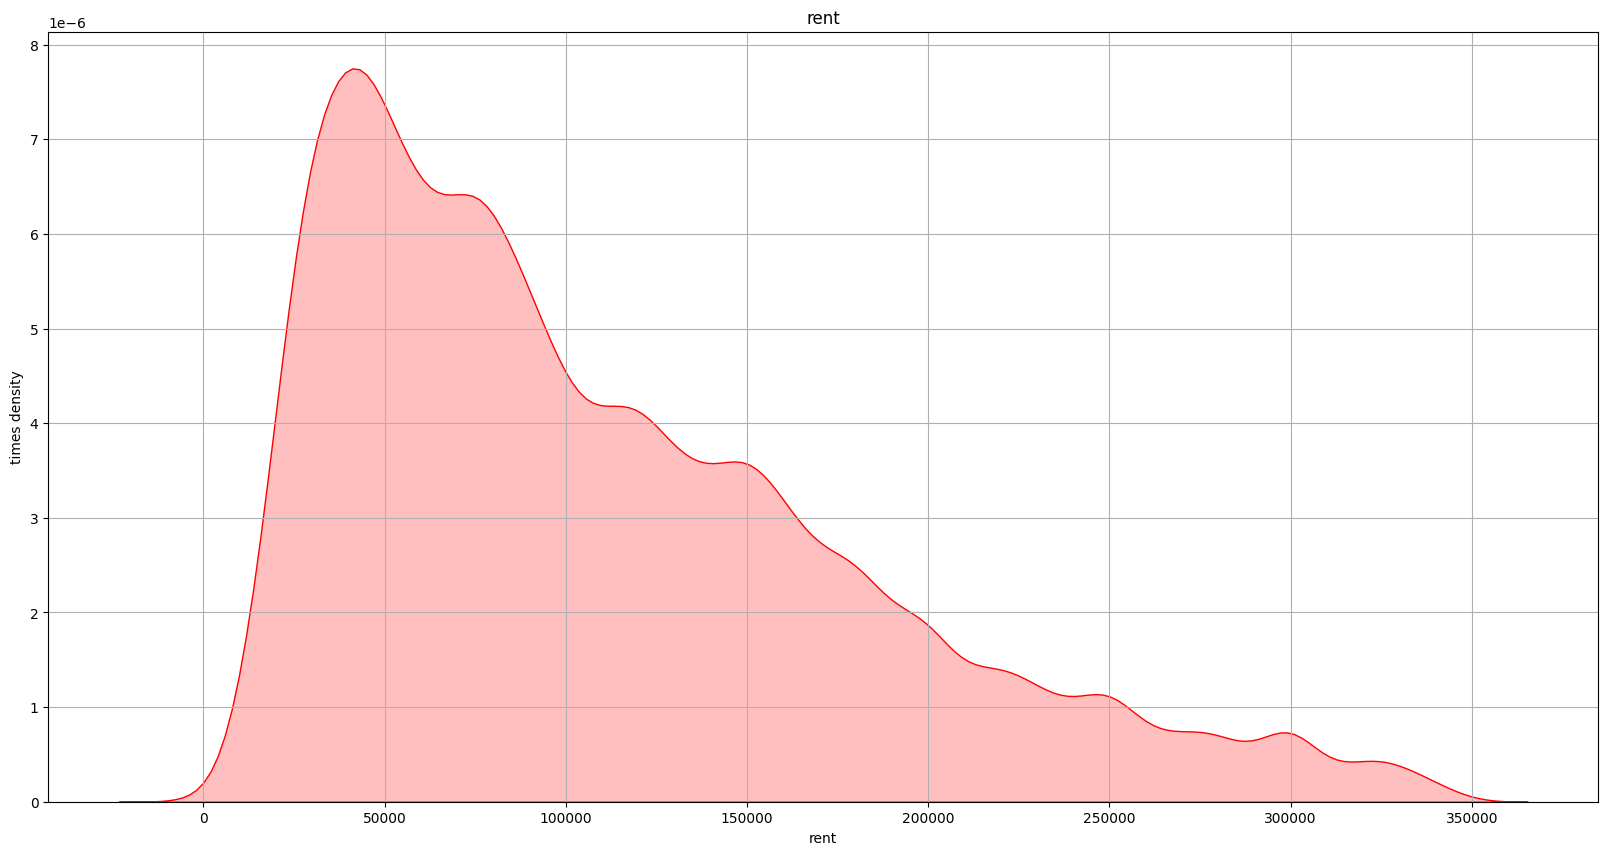

In [111]:
figure(figsize=(20,10))
sns.kdeplot(data= data ,x=data["Rent"],color="red",fill=True)
title("rent")
xlabel("rent")
ylabel("times density")
grid(True)
show()

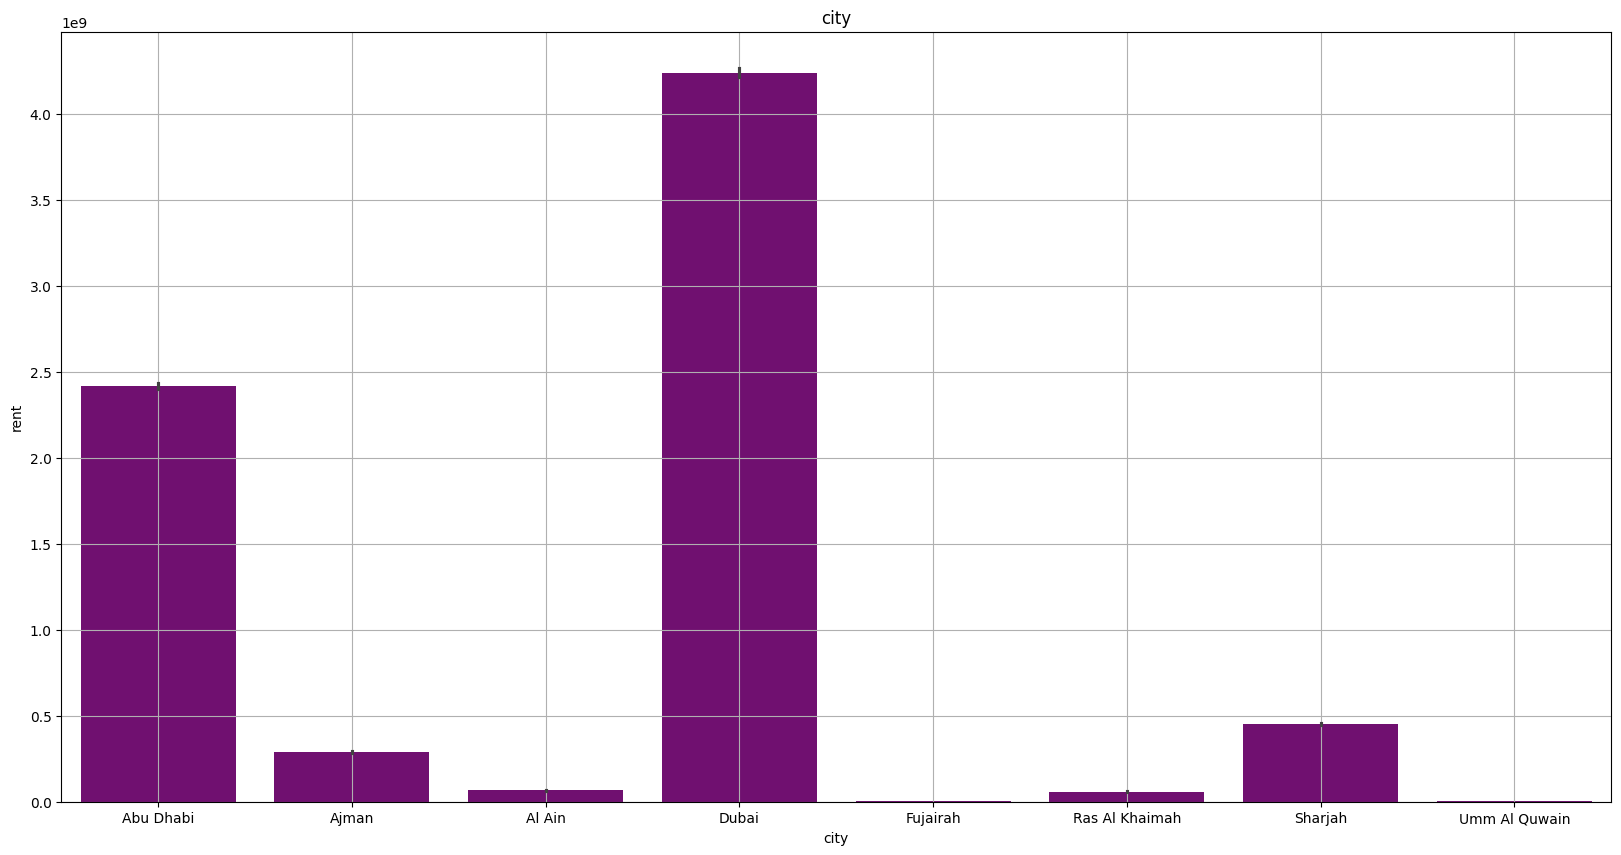

In [112]:
figure(figsize=(20,10))
sns.barplot(data= data ,x=data["City"],y=data["Rent"],color="purple",estimator=sum)
title("city")
xlabel("city")
ylabel("rent")
grid(True)
show()

<h3> Data Preprocessing  </h3>

In [113]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in data.columns:
   if data[x].dtype == "object":
       datanew = le.fit_transform(data[x])
       data[x] = datanew

In [114]:
data.sample(5)

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
57902,1337,135000,1,2,0,1276,105.799373,2,0,1,0,505,47,262,3,25.186684,55.274705
26016,728,26000,1,2,0,750,34.666667,1,0,1,0,524,28,162,1,25.385444,55.441620
48854,1296,69999,1,2,0,652,107.360429,2,0,1,0,470,82,318,3,25.055945,55.207465
4877,686,94999,2,4,0,1800,52.777222,2,0,1,0,518,34,148,0,24.485931,54.600939
40503,2660,250000,2,2,0,1083,230.840259,0,0,1,0,525,27,265,3,25.095619,55.138001


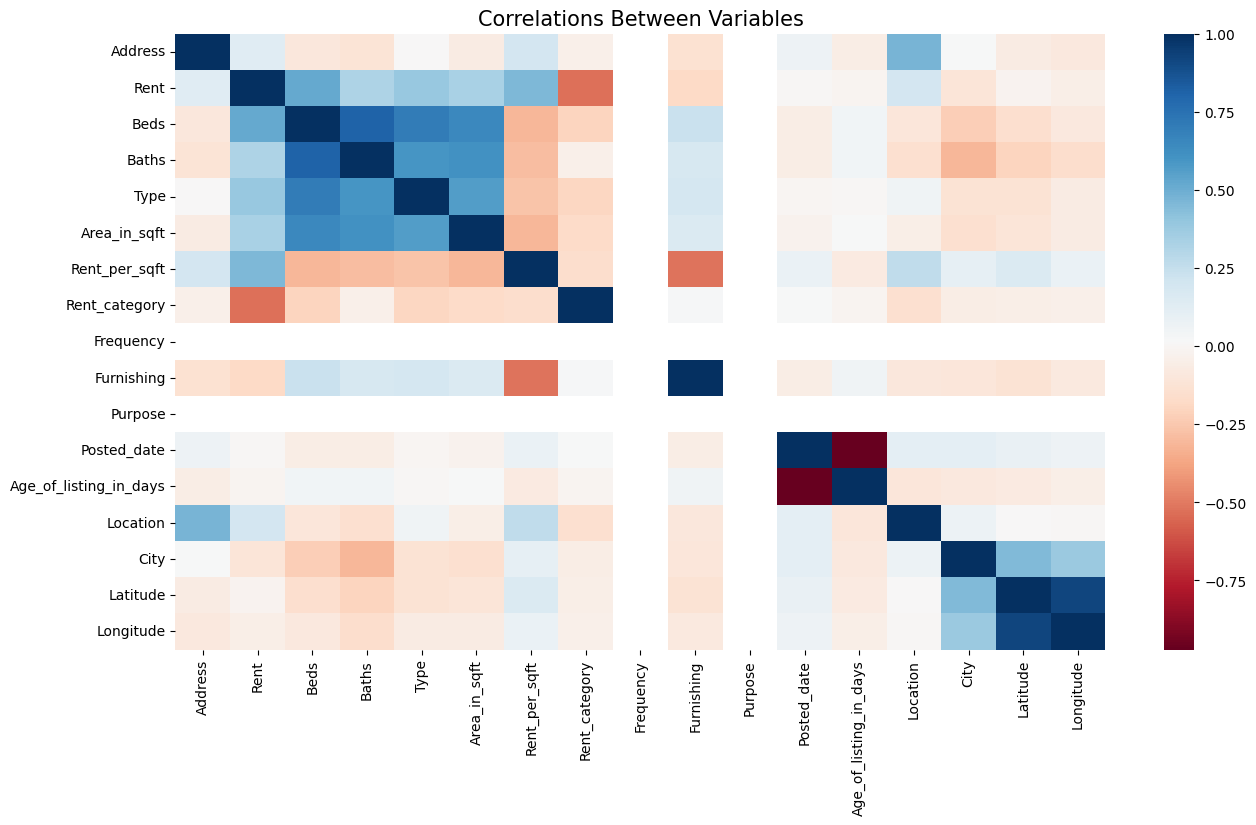

In [115]:
figure(figsize=(15,8))
sns.heatmap(data.corr(), cmap="RdBu")
title("Correlations Between Variables", size=15)
show()

In [116]:
for col in data.columns:
    if data[col].dtype != "object":  
        if data["Rent"].corr(data[col]) < 0.2:
            data.drop(col,axis = 1 ,inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68870 entries, 0 to 73741
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rent           68870 non-null  int64  
 1   Beds           68870 non-null  int64  
 2   Baths          68870 non-null  int64  
 3   Type           68870 non-null  int32  
 4   Area_in_sqft   68870 non-null  int64  
 5   Rent_per_sqft  68870 non-null  float64
 6   Frequency      68870 non-null  int32  
 7   Purpose        68870 non-null  int32  
dtypes: float64(1), int32(3), int64(4)
memory usage: 3.9 MB


c:\Users\W.I\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\W.I\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\W.I\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\W.I\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [117]:
x = data.drop(["Rent"],axis=1)
y = data["Rent"]

<h2> Data Spliting </h2>

In [118]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

<h2> Data Modeling </h2>

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,median_absolute_error

In [120]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

lmedae = median_absolute_error(y_test,y_pred)
lmae = mean_absolute_error(y_test,y_pred)
lsme = mean_squared_error(y_test,y_pred)
lr2 = r2_score(y_test,y_pred)

print("meadian absolute error is : " , lmedae)
print("mean absolute error is : " , lmae)
print("mean square error is : ",lsme)
print("r-squared is : " , lr2)

meadian absolute error is :  18111.85309843692
mean absolute error is :  25856.154229687625
mean square error is :  1376253949.8881223
r-squared is :  0.7376118294916114


In [121]:
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)

y_pred = xgbr.predict(x_test)

xgbmedae = median_absolute_error(y_test,y_pred)
xgbmae = mean_absolute_error(y_test,y_pred)
xgbsme = mean_squared_error(y_test,y_pred)
xgbr2 = r2_score(y_test,y_pred)

print("meadian absolute error is : " , xgbmedae)
print("mean absolute error is : " , xgbmae)
print("mean square error is : ", xgbsme)
print("r-squared is : " , xgbr2)

meadian absolute error is :  1196.75390625
mean absolute error is :  1998.2952949454134
mean square error is :  14890325.094694013
r-squared is :  0.997161101582895


In [122]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

y_pred = rfr.predict(x_test)

rfmedae = median_absolute_error(y_test,y_pred)
rfmae = mean_absolute_error(y_test,y_pred)
rfsme = mean_squared_error(y_test,y_pred)
rfr2 = r2_score(y_test,y_pred)

print("meadian absolute error is : " , rfmedae)
print("mean absolute error is : " , rfmae)
print("mean square error is : ", rfsme)
print("r-squared is : " , rfr2)

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

y_pred = gbr.predict(x_test)

gbmedae = median_absolute_error(y_test,y_pred)
gbmae = mean_absolute_error(y_test,y_pred)
gbsme = mean_squared_error(y_test,y_pred)
gbr2 = r2_score(y_test,y_pred)

print("median absolute error is : " , gbmedae)
print("mean absolute error is : " , gbmae)
print("mean square error is : ", gbsme)
print("r-squared is : " , gbr2)

median absolute error is :  3269.269391191192
mean absolute error is :  4799.1943083794395
mean square error is :  53526846.48076129
r-squared is :  0.9899601003827468


<h2> Model Evaluation </h2>

In [ ]:
scores = {
    "median absolute error" :[ lmedae , xgbmedae , rfmedae , gbmedae ],
    "mean absolute error" : [ lmae , xgbmae , rfmae , gbmae ],
    "mean square error" : [ lsme , xgbsme , rfsme , gbsme ],
    "r-squared" : [ lr2 , xgbr2 , rfr2 , gbr2 ]
       }
indexes = [ "LinearRegression" , "XGBRegessor" , "RandomForestRegressor" , "GradientBoostingRegressor"]
datascore = DataFrame(scores ,index= indexes)
datascore["r-squared"].astype("float64")
datascore["mean square error"].astype("float64")
datascore["mean absolute error"].astype("float64")
datascore["median absolute error"].astype("float64")
datascore.head(4)


,median absolute error,mean absolute error,mean square error,r-squared
LinearRegression,18081.857282,26170.817452,1.397063e+09,0.737956
XGBRegessor,1215.542969,2083.166478,1.793288e+07,0.996636
RandomForestRegressor,60.000000,409.029624,2.983856e+06,0.999440
GradientBoostingRegressor,3269.269391,4799.194308,5.352685e+07,0.989960


C:\Users\W.I\AppData\Local\Temp\ipykernel_9192\387659135.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( datascore["r-squared"],palette= "mako" )


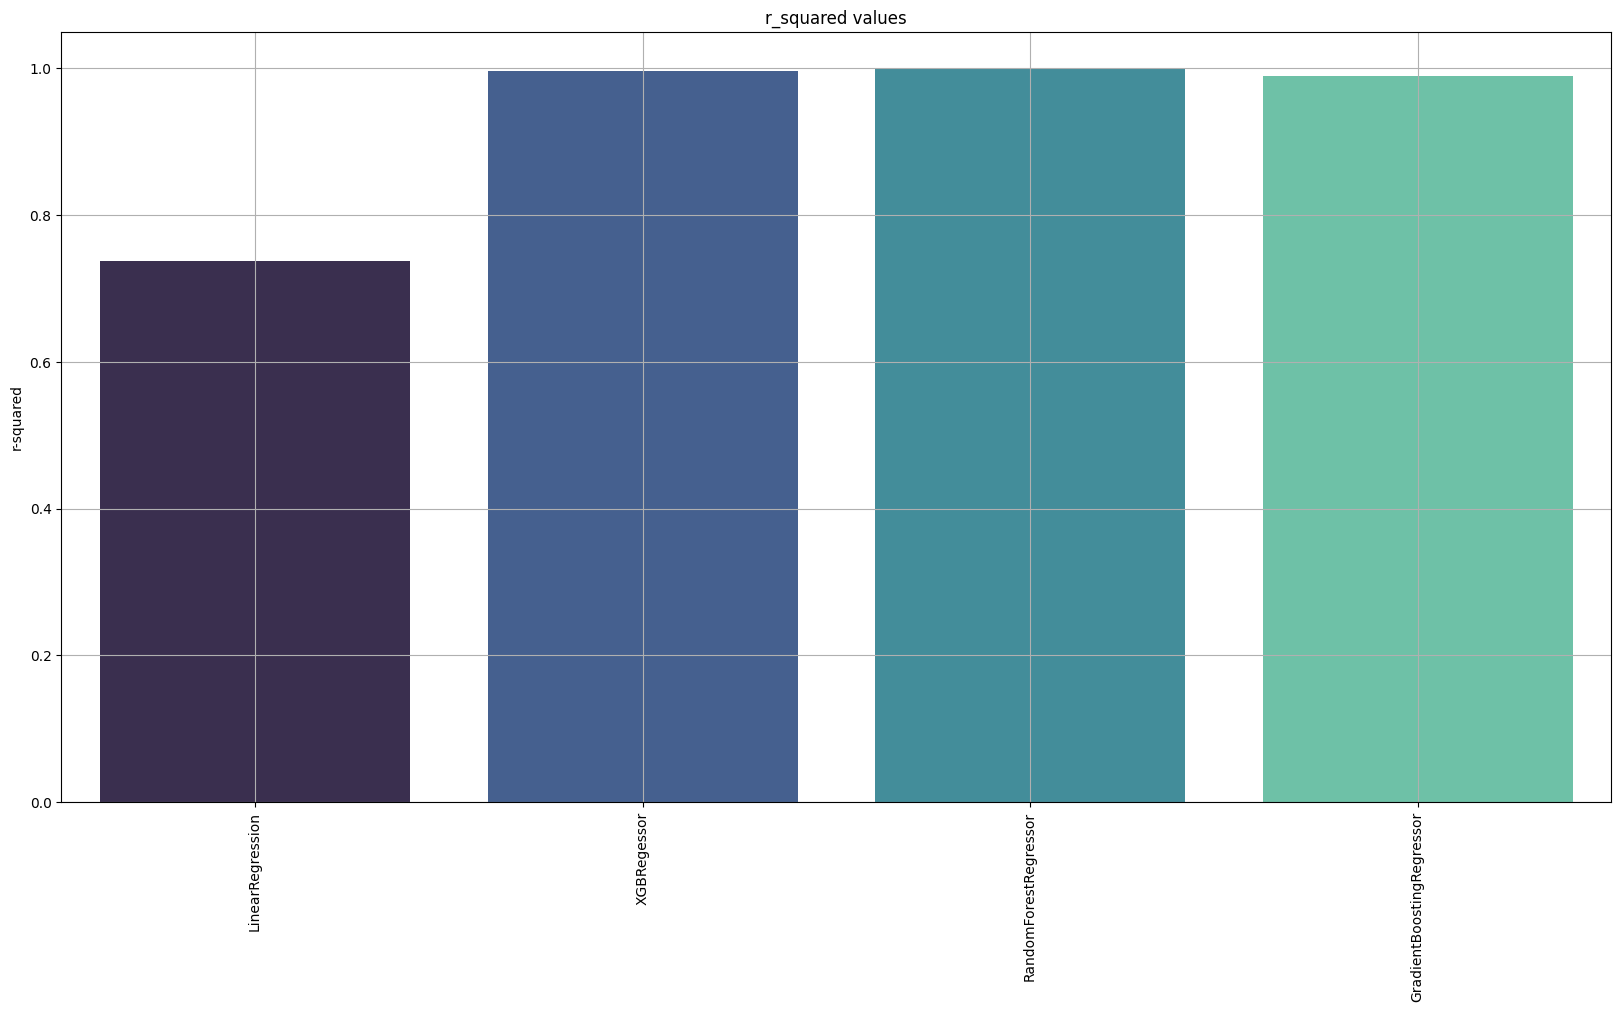

In [ ]:
figure(figsize=(20,10))
sns.barplot( datascore["r-squared"],palette= "mako" )
title("r_squared values")
grid(True)
xticks(rotation=90)
show()

C:\Users\W.I\AppData\Local\Temp\ipykernel_9192\1776364678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( datascore["mean square error"] , palette= "deep" )


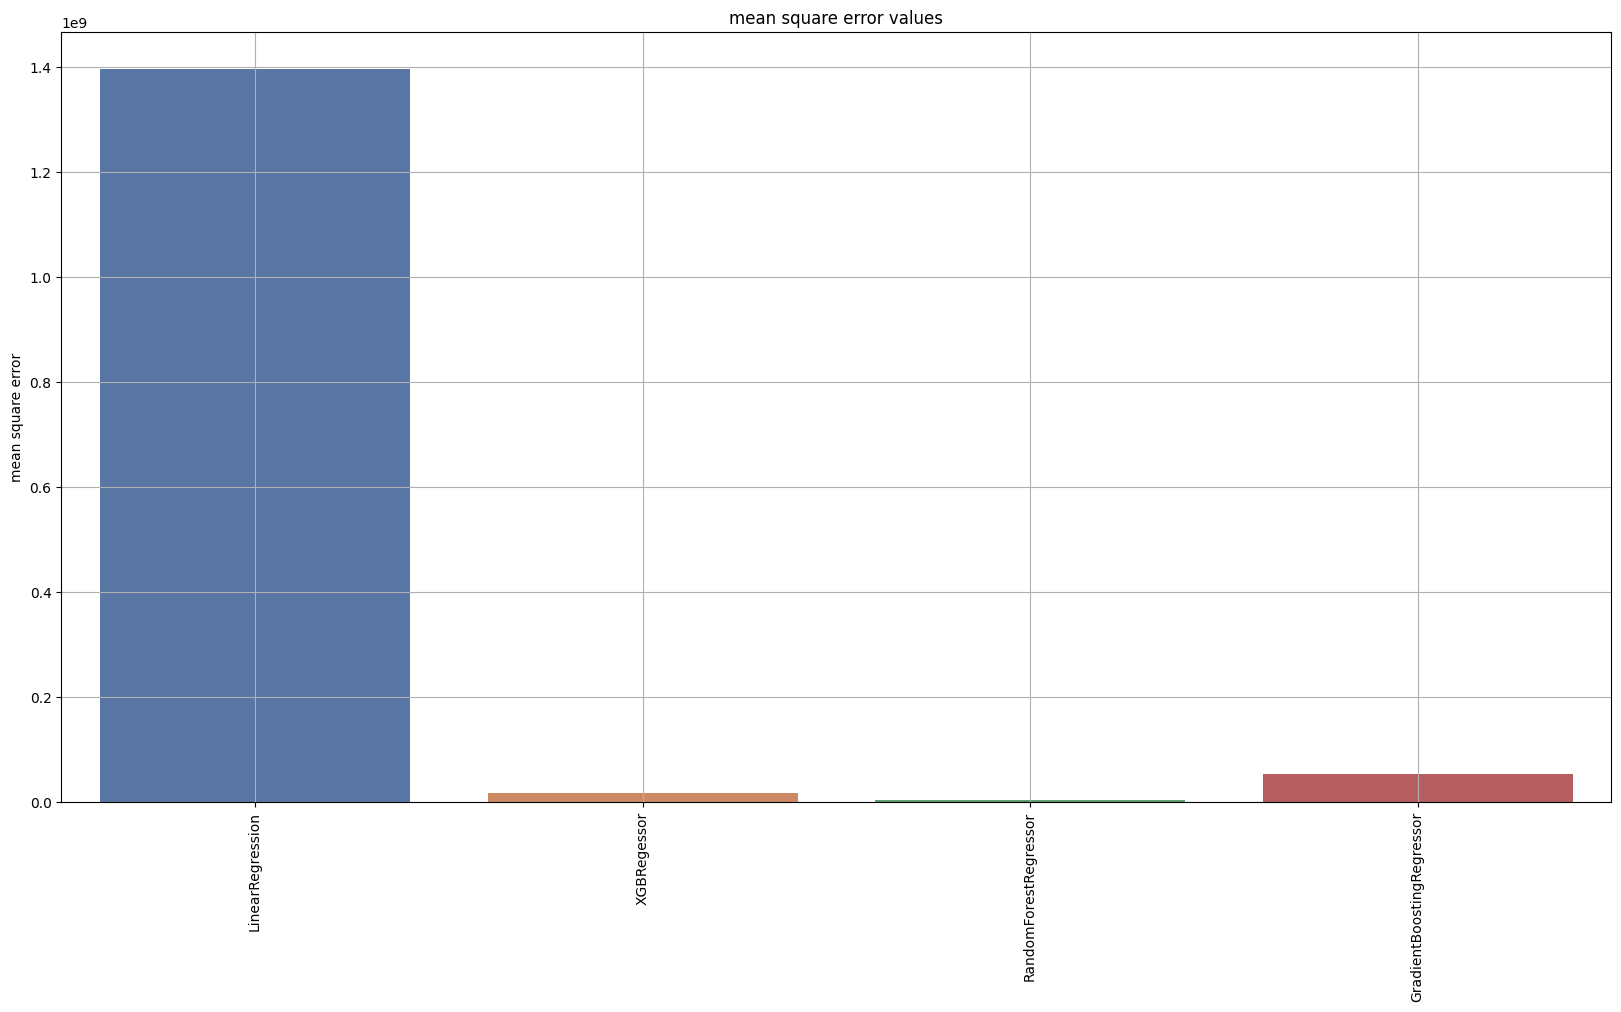

In [ ]:
figure(figsize=(20,10))
sns.barplot( datascore["mean square error"] , palette= "deep" )
title("mean square error values")
grid(True)
xticks(rotation=90)
show()